## Pendahuluan

Proyek ini bertujuan untuk menganalisis pola penjualan dan faktor operasional
pada sebuah outlet fast food menggunakan data transaksi historis.

Analisis difokuskan pada:
- Pola penjualan berdasarkan waktu
- Kontribusi produk terhadap penjualan
- Perbedaan pola berdasarkan kategori produk
- Pengaruh waktu penjualan dan channel transaksi

Hasil analisis diharapkan dapat memberikan insight bisnis
untuk mendukung pengambilan keputusan operasional.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("Balaji Fast Food Sales.csv")

df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


## Data Understanding

Langkah awal dilakukan untuk memahami struktur data,
tipe variabel, serta memastikan konsistensi nilai numerik.

In [19]:
df.describe(include='all')

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
count,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000.000000,893,1000,1000
unique,NaN,348,7,2,NaN,NaN,NaN,2,2,5
top,NaN,8/31/2022,Cold coffee,Fastfood,NaN,NaN,NaN,Cash,Mr.,Night
freq,NaN,8,161,686,NaN,NaN,NaN,476,512,205
mean,500.500000,NaN,NaN,NaN,33.315000,8.162000,275.230000,NaN,NaN,NaN
std,288.819436,NaN,NaN,NaN,14.921744,4.413075,204.402979,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,20.000000,1.000000,20.000000,NaN,NaN,NaN
25%,250.750000,NaN,NaN,NaN,20.000000,4.000000,120.000000,NaN,NaN,NaN
50%,500.500000,NaN,NaN,NaN,25.000000,8.000000,240.000000,NaN,NaN,NaN
75%,750.250000,NaN,NaN,NaN,50.000000,12.000000,360.000000,NaN,NaN,NaN


In [33]:
df['calculated_revenue'] = df['item_price'] * df['quantity']

(df['calculated_revenue'] == df['transaction_amount']).value_counts()

True    1000
Name: count, dtype: int64

## Data Preparation

Dataset memiliki format tanggal dengan pemisah berbeda (`-` dan `/`)
namun urutan tetap month-day-year (m/d/y).

In [34]:
df['date_converted'] = (
    df['date']
      .astype(str)
      .str.replace("-", "/", regex=False)
)

df['date_converted'] = pd.to_datetime(
    df['date_converted'],
    format="%m/%d/%Y",
    errors="raise"
)

df['date'] = df['date_converted']
df = df.drop(columns=['date_converted'])

In [35]:
df['transaction_type'] = df['transaction_type'].fillna('Unknown')

### Bagaimana Pola Penjualan Berdasarkan Waktu?
Memahami pola penjualan berdasarkan waktu penting untuk:
- Menilai stabilitas permintaan
- Mengidentifikasi fluktuasi penjualan
- Mendukung perencanaan operasional harian

### Metode Analisis
Data transaksi diagregasi menjadi penjualan harian
berdasarkan total kuantitas dan total revenue.

In [36]:
daily_sales = (
    df.groupby('date')
      .agg(
          total_quantity=('quantity', 'sum'),
          total_revenue=('transaction_amount', 'sum')
      )
      .reset_index()
      .sort_values('date')
)

daily_sales.head()

,date,total_quantity,total_revenue
0,2022-04-01,7,420
1,2022-04-02,30,1500
2,2022-04-03,22,480
3,2022-04-04,48,2500
4,2022-04-05,2,100


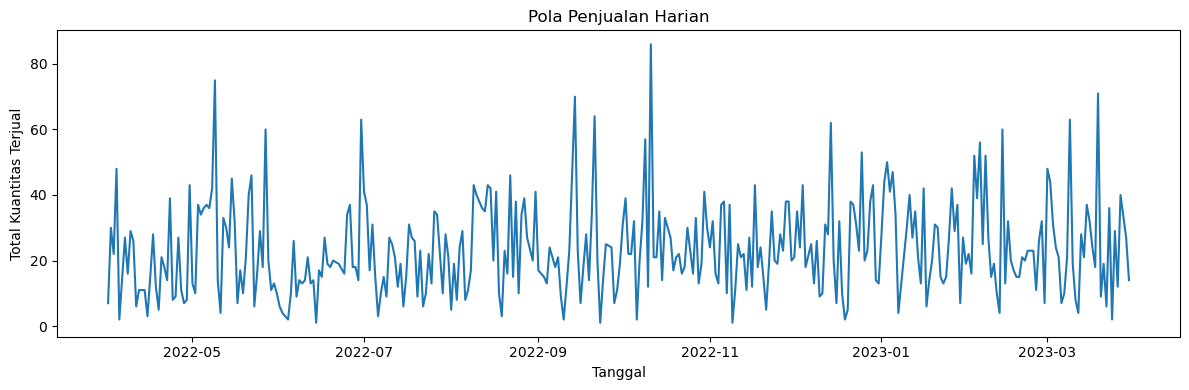

In [37]:
plt.figure(figsize=(12,4))
plt.plot(daily_sales['date'], daily_sales['total_quantity'])
plt.title("Pola Penjualan Harian")
plt.xlabel("Tanggal")
plt.ylabel("Total Kuantitas Terjual")
plt.tight_layout()
plt.savefig("images/daily_sales.png")
plt.show()

### Hasil & Interpretasi

Grafik penjualan harian menunjukkan fluktuasi yang sangat tinggi dari hari ke hari.
Terdapat hari dengan volume penjualan yang sangat rendah (kurang dari 5 unit),
serta hari dengan lonjakan penjualan yang signifikan (lebih dari 60 unit).

Tidak terlihat tren kenaikan atau penurunan yang konsisten dalam jangka waktu pengamatan,
yang mengindikasikan bahwa permintaan harian bersifat tidak stabil dan sangat dipengaruhi
oleh faktor operasional jangka pendek seperti promosi, kondisi harian, atau perilaku pelanggan.

Implikasi bisnis:
- Perencanaan berbasis penjualan harian memiliki risiko tinggi
- Pendekatan agregasi (misalnya mingguan) atau analisis faktor operasional
  lebih relevan untuk pengambilan keputusan

### Produk Apa yang Paling Berkontribusi terhadap Penjualan?
Mengetahui produk dengan kontribusi terbesar penting untuk:
- Fokus pada menu utama
- Evaluasi performa produk
- Pengambilan keputusan terkait stok dan promosi

### Metode Analisis
Analisis dilakukan dengan menghitung total kuantitas
dan total revenue untuk setiap produk.

In [38]:
item_summary = (
    df.groupby('item_name')
      .agg(
          total_quantity=('quantity', 'sum'),
          total_revenue=('transaction_amount', 'sum')
      )
      .sort_values('total_quantity', ascending=False)
)

item_summary

,total_quantity,total_revenue
item_name,,
Cold coffee,1361,54440
Sugarcane juice,1278,31950
Panipuri,1226,24520
Frankie,1150,57500
Sandwich,1097,65820
Aalopuri,1044,20880
Vadapav,1006,20120


### Hasil & Interpretasi
Hasil analisis menunjukkan bahwa kontribusi penjualan tidak hanya ditentukan oleh volume,
tetapi juga oleh harga produk.

Beberapa temuan utama:
- **Cold coffee** dan **Sugarcane juice** memiliki volume penjualan tertinggi,
  menunjukkan permintaan yang konsisten dari sisi kuantitas.
- **Sandwich** dan **Frankie** menghasilkan revenue tertinggi meskipun volume penjualannya
  tidak selalu paling besar, mengindikasikan harga jual yang lebih tinggi per unit.
- Produk seperti **Vadapav** dan **Aalopuri** memiliki kontribusi volume yang cukup besar,
  namun menghasilkan revenue yang relatif lebih rendah.

Implikasi bisnis:
- Produk dengan **volume tinggi + revenue tinggi** merupakan menu inti yang perlu dijaga ketersediaannya.
- Produk dengan **volume tinggi tetapi revenue rendah** berpotensi dievaluasi dari sisi harga atau bundling.
- Produk dengan **revenue tinggi meskipun volume lebih rendah** layak dipertimbangkan sebagai fokus promosi
  karena memberikan margin yang lebih baik.

### Apakah Kategori Produk Memiliki Pola Berbeda?
Perbedaan pola antara kategori produk dapat memengaruhi:
- Perencanaan menu
- Pengadaan bahan baku
- Strategi penjualan

### Metode Analisis
Produk dikelompokkan berdasarkan `item_type`
dan dianalisis kontribusi penjualannya.

In [39]:
category_summary = (
    df.groupby('item_type')
      .agg(
          avg_quantity=('quantity', 'mean'),
          total_quantity=('quantity', 'sum'),
          total_revenue=('transaction_amount', 'sum')
      )
)

category_summary

,avg_quantity,total_quantity,total_revenue
item_type,,,
Beverages,8.404459,2639,86390
Fastfood,8.051020,5523,188840


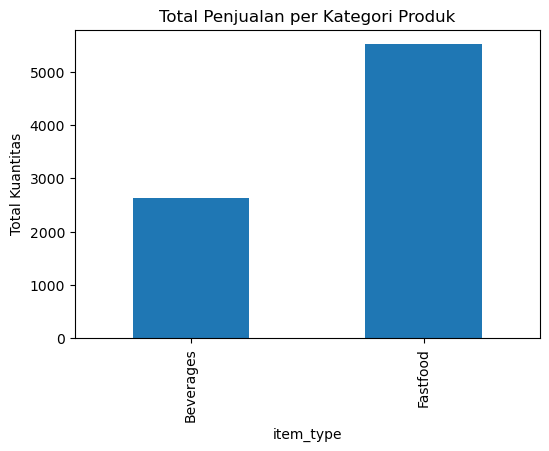

In [40]:
category_summary['total_quantity'].plot(
    kind='bar',
    figsize=(6,4),
    title="Total Penjualan per Kategori Produk"
)
plt.ylabel("Total Kuantitas")
plt.savefig("images/category_summary.png")
plt.show()

### Hasil & Interpretasi
Hasil analisis menunjukkan perbedaan yang cukup jelas antara kategori **Fastfood** dan **Beverages**.

Temuan utama:
- Kategori **Fastfood** memiliki **total kuantitas** dan **total revenue** yang jauh lebih tinggi
  dibandingkan kategori Beverages, menunjukkan bahwa Fastfood merupakan kontributor utama
  terhadap volume dan pendapatan.
- Kategori **Beverages** memiliki **rata-rata kuantitas per transaksi** yang sedikit lebih tinggi
  dibandingkan Fastfood, meskipun kontribusi totalnya lebih kecil.
- Perbedaan ini mengindikasikan bahwa transaksi Beverages cenderung melibatkan pembelian
  dalam jumlah sedikit lebih banyak per transaksi, namun frekuensi atau variasi produknya
  lebih rendah dibandingkan Fastfood.

Implikasi bisnis:
- **Fastfood** berperan sebagai kategori inti yang perlu menjadi fokus utama pengelolaan stok
  dan operasional.
- **Beverages** berpotensi dimaksimalkan melalui strategi bundling atau cross-selling
  dengan produk Fastfood untuk meningkatkan kontribusi totalnya.

### Apakah Waktu Penjualan Berpengaruh terhadap Volume?
Mengetahui waktu dengan penjualan tertinggi penting untuk:
- Penjadwalan karyawan
- Pengaturan jam operasional
- Persiapan stok

### Metode Analisis
Analisis dilakukan berdasarkan variabel `time_of_sale`.

In [41]:
time_summary = (
    df.groupby('time_of_sale')
      .agg(
          avg_quantity=('quantity', 'mean'),
          total_quantity=('quantity', 'sum')
      )
      .sort_values('total_quantity', ascending=False)
)

time_summary

,avg_quantity,total_quantity
time_of_sale,,
Night,8.580488,1759
Afternoon,8.360976,1714
Midnight,7.914573,1575
Morning,8.284211,1574
Evening,7.661692,1540


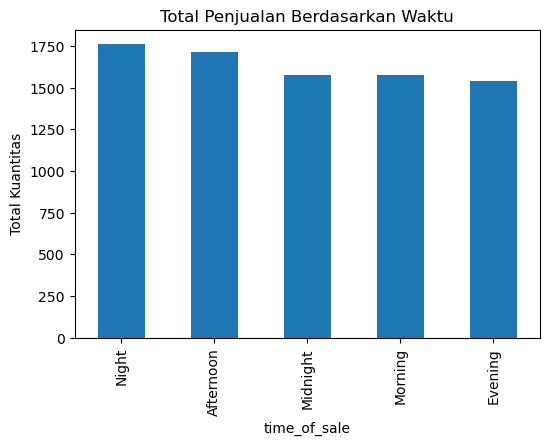

In [42]:
time_summary['total_quantity'].plot(
    kind='bar',
    figsize=(6,4),
    title="Total Penjualan Berdasarkan Waktu"
)
plt.ylabel("Total Kuantitas")
plt.savefig("images/time_summary.png")
plt.show()

### Hasil & Interpretasi
Hasil analisis menunjukkan bahwa waktu penjualan memiliki pengaruh terhadap volume penjualan,
meskipun perbedaannya tidak bersifat ekstrem.

Temuan utama:
- Waktu **Night** dan **Afternoon** memiliki **total kuantitas penjualan tertinggi**,
  mengindikasikan periode dengan aktivitas transaksi yang paling ramai.
- Waktu **Midnight**, **Morning**, dan **Evening** menunjukkan volume penjualan yang relatif lebih rendah,
  namun tetap berada pada kisaran yang cukup seimbang.
- Rata-rata kuantitas per transaksi relatif seragam di semua waktu,
  dengan nilai sedikit lebih tinggi pada periode **Night**.

Implikasi bisnis:
- Periode **Night** dan **Afternoon** perlu mendapatkan prioritas lebih dalam
  penjadwalan karyawan dan kesiapan stok.
- Perbedaan volume yang tidak terlalu ekstrem menunjukkan bahwa jam operasional
  masih cukup stabil sepanjang hari, tanpa ketergantungan pada satu waktu tertentu.

### Apakah Channel Transaksi Berpengaruh?
Channel transaksi memengaruhi perilaku pelanggan
dan efektivitas strategi penjualan.

### Metode Analisis
Transaksi dianalisis berdasarkan jenis channel.

In [43]:
channel_summary = (
    df.groupby('transaction_type')
      .agg(
          avg_quantity=('quantity', 'mean'),
          total_quantity=('quantity', 'sum'),
          total_revenue=('transaction_amount', 'sum')
      )
)

channel_summary

,avg_quantity,total_quantity,total_revenue
transaction_type,,,
Cash,8.283613,3943,132840
Online,7.892086,3291,110595
Unknown,8.672897,928,31795


### Hasil & Interpretasi
Hasil analisis menunjukkan bahwa channel transaksi memiliki perbedaan kontribusi,
meskipun tidak bersifat ekstrem.

Temuan utama:
- Channel **Cash** memberikan kontribusi **terbesar** baik dari sisi total kuantitas
  maupun total revenue, menunjukkan bahwa transaksi offline masih menjadi kanal utama.
- Channel **Online** memiliki kontribusi yang cukup signifikan, meskipun sedikit lebih rendah
  dibandingkan transaksi Cash, yang mengindikasikan potensi pengembangan channel digital.
- Channel **Unknown** memiliki kontribusi paling kecil, namun rata-rata kuantitas per transaksi
  relatif sebanding dengan channel lainnya, sehingga kemungkinan hanya mencerminkan keterbatasan pencatatan data.

Implikasi bisnis:
- Transaksi **Cash** masih perlu menjadi fokus utama dalam operasional harian.
- Channel **Online** berpotensi ditingkatkan melalui promosi atau optimalisasi layanan digital.
- Pencatatan jenis channel transaksi perlu diperbaiki untuk mengurangi kategori **Unknown**
  dan meningkatkan kualitas analisis di masa depan.

## 10. Kesimpulan

Berdasarkan hasil analisis data transaksi fast food, dapat disimpulkan bahwa
pola penjualan dan performa bisnis lebih dipengaruhi oleh faktor operasional
dan karakteristik produk dibandingkan pola waktu yang bersifat musiman.

Kesimpulan utama dari analisis ini adalah sebagai berikut:

1. **Pola penjualan harian bersifat sangat fluktuatif**  
   Penjualan menunjukkan variasi yang tinggi dari hari ke hari tanpa tren yang konsisten.
   Hal ini mengindikasikan bahwa perencanaan berbasis data harian memiliki risiko tinggi
   dan kurang stabil untuk pengambilan keputusan strategis.

2. **Sebagian kecil produk memberikan kontribusi besar terhadap penjualan**  
   Produk seperti *Sandwich*, *Frankie*, dan *Cold coffee* memiliki kontribusi signifikan
   terhadap total volume dan revenue. Temuan ini menunjukkan pentingnya fokus pada
   produk inti (core products) dalam pengelolaan menu dan stok.

3. **Kategori Fastfood merupakan kontributor utama bisnis**  
   Dibandingkan dengan Beverages, kategori Fastfood menghasilkan total kuantitas dan
   revenue yang jauh lebih besar. Namun, Beverages memiliki rata-rata kuantitas per transaksi
   yang sedikit lebih tinggi, membuka peluang strategi bundling atau cross-selling.

4. **Waktu penjualan memengaruhi volume, tetapi tidak secara ekstrem**  
   Periode Night dan Afternoon cenderung memiliki volume penjualan lebih tinggi,
   namun perbedaan antar waktu relatif seimbang. Hal ini menunjukkan bahwa
   operasional bisnis cukup stabil sepanjang hari tanpa ketergantungan pada satu periode tertentu.

5. **Channel transaksi Cash masih mendominasi, namun Online memiliki potensi**  
   Transaksi Cash memberikan kontribusi terbesar terhadap penjualan, sementara channel Online
   menunjukkan peran yang cukup signifikan. Kategori transaksi Unknown mengindikasikan
   perlunya perbaikan kualitas pencatatan data.

Secara keseluruhan, analisis ini menunjukkan bahwa pendekatan analisis deskriptif
dan diagnostik sudah cukup efektif untuk memberikan insight operasional yang relevan
bagi bisnis fast food. Fokus pada produk utama, kategori dengan kontribusi tinggi,
serta pengelolaan waktu dan channel transaksi dapat membantu meningkatkan
efisiensi dan kualitas pengambilan keputusan berbasis data.